# Table of Contents:

## [1. Definition](#1)
## [2. Hypothesis](#2)
## [3. How do we know where to split?](#3)
## [4. CART Algorithm](#4)
## [5. Assumptions of Decision Trees](#5)
## [6. How to prepare data for decision tree modeling](#6)
## [7. Hyperparameter Optimization](#7)
## [8. Are tree based algorithms better than linear models?](#8)
## [9. Solutions to Overfitting](#9)
## [10. Solutions to Underfitting](#10)
## [11. Pros vs Cons](#11)

# Definition <a class="anchor" id="1"></a>

Decision Trees are versatile Machine Learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks. They are
very powerful algorithms, capable of fitting complex datasets. 

One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, <b>they don’t require feature
scaling or centering at all.</b>

The structure of a decision tree can be defined by a root node, which is the most important splitting feature. In the image below, the bold text in black represents a condition/internal node, based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf, in this case, whether the passenger died or survived, represented as red and green text respectively.

<img src="https://miro.medium.com/max/486/1*XMId5sJqPtm8-RIwVVz2tg.png">

# Hypothesis <a class="anchor" id="2"></a>

Our hypothesis function is going to be a decision tree $h_{\theta}(x)$ where $\theta$ stands for all the parameters that define the tree like the set of all the variables you split on and thresholds you split at.

So you can think of $\theta$ as a list of indices that describe the split features and it is also list of thresholds that descibe where you split at.

Video: https://scs.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=528b2d49-7497-479a-877f-a8bd0139747f

<img src="https://scs.hosted.panopto.com/Panopto/Pages/Viewer/Thumb.aspx?eventTargetPID=58fdbb33-bd0f-4c51-b887-0109c299bb2b&sessionPID=07ad6a3f-7219-4e00-83ff-a8bd01397476&number=12&isPrimary=false&absoluteTime=13167774788.151775">

# How do we know where to split? <a class="anchor" id="3"></a>

An attribute selection measure is a heuristic for selecting the splitting criterion that’s most capable of deciding how to partition data in such a way that would result in individual classes. 

- Entropy
- Gini impurity
- Information gain



<b>1. Information Gain:</b>

It allows us to get the gain for a specific feature on the split. For that it's necessary to introduce the notion of parent and children. The parent is where the data is full and children represent the data filtered by the value of the feature (if we sum the length of each children it gives us the length of the parent).

<img src="https://qph.fs.quoracdn.net/main-qimg-dfad11c548327127fadd25ff992ace92">

Choose the split that achieves the highest information gain.

<b>2. Gini impurity / Gini index:</b>

It is a measure of total variance across "K" different classes. It is a measure of the nodes impurity so a smaller value indicates less impure which means that a node contains predominantly observations from a single class.

<img src="https://miro.medium.com/max/2856/1*gc1d1Sf8F7NoXAEnRlitbg.png">


<b>3. Entropy: </b>

It can be thought of as how unpredictable a dataset is.

- A set of only one class (say, blue ) is extremely predictable: anything in it is blue. This would have low entropy.
- A set of many mixed classes  is unpredictable: a given element could be any color! This would have high entropy.

<img src="https://www.saedsayad.com/images/Entropy_3.png">

So choose a split that gives you low entropy value.

# CART Algorithm <a class="anchor" id="4"></a>

Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two children.

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm
first splits the training set in two subsets using a single feature k and a threshold
$t_{k}$ (e.g., “petal length ≤ 2.45 cm”). How does it choose k and $t_{k}$? It searches for the
pair (k, tk) that produces the purest subsets (weighted by their size). 


## Cost function for classification

The cost function that the algorithm tries to minimize for classification is given:

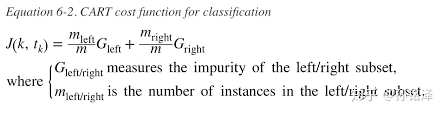

Once it has successfully split the training set in two, it splits the subsets using the
same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches
the maximum depth (defined by the max_depth hyperparameter), or if it cannot
find a split that will reduce impurity.

<b> Greedy algorithm: </b>

CART algorithm is a greedy algorithm: it greedily
searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.

## Cost function for regression

The CART algorithm works mostly the same way as earlier, except that instead of trying
to split the training set in a way that minimizes impurity, it now tries to split the
training set in a way that minimizes the MSE.

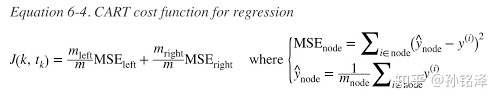

## Gini impurity or entropy

By default, the Gini impurity measure is used, but you can select the entropy impurity
measure instead by setting the criterion hyperparameter to "entropy".

So should you use Gini impurity or entropy? The truth is, most of the time it <b>does not
make a big difference: they lead to similar trees.</b> Gini impurity is slightly faster to
compute, so it is a good default. However, when they differ, Gini impurity tends to
isolate the most frequent class in its own branch of the tree, while entropy tends to
produce slightly more balanced trees.

# Assumptions of decision trees <a class="anchor" id="5"></a>

It makes no assumptions of the training data or prediction residuals; e.g., no distributional, independence, or constant variance assumptions

# How to Prepare Data for Decision Tree Modeling <a class="anchor" id="6"></a>

Source: https://heartbeat.fritz.ai/understanding-the-mathematics-behind-decision-trees-22d86d55906

1. Decision trees tend to overfit on data that has a large feature space. Selecting the right number of features is important, keeping in mind the size of the dataset, since a tree with a smaller dataset in high-dimensional space is very likely to overfit.


2. Consider performing dimensionality reduction (principal component analysis or feature selection) to get a better idea of redundant, useless, correlated, or discriminative features.


3. Use min_samples_split or min_samples_leaf to ensure that quite a few samples support a decision in the tree, while keeping in mind the splitting attributes. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data.

# Hyperparameter Optimization <a class="anchor" id="7"></a>

Source: 

- https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/

- https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3


The decision tree has a plethora of hyperparameters that require fine-tuning in order to derive the best possible model that reduces the generalization error as much as possible.

<b>1. Minimum samples for a node split</b>


- Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
- Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
- Too high values can lead to under-fitting hence, it should be tuned using CV.


<b>2. Minimum samples for a terminal node (leaf)</b>


- Defines the minimum samples (or observations) required in a terminal node or leaf.
- Used to control over-fitting similar to min_samples_split.
- Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.


<b>3. Maximum depth of tree (vertical depth)</b>


- The maximum depth of a tree.
- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- Should be tuned using CV.



<b>4. Maximum number of terminal nodes</b>


- The maximum number of terminal nodes or leaves in a tree.
- Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.


<b>5. Maximum features to consider for split</b>


- The number of features to consider while searching for a best split. These will be randomly selected.
- As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
- Higher values can lead to over-fitting but depends on case to case.

# Are tree based algorithms better than linear models? <a class="anchor" id="8"></a>

Source: https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/

Actually, you can use any algorithm. It is dependent on the type of problem you are solving. Let’s look at some key factors which will help you to decide which algorithm to use:

1. If the relationship between dependent & independent variable is well approximated by a linear model, linear regression will outperform tree based model.
2. If there is a high non-linearity & complex relationship between dependent & independent variables, a tree model will outperform a classical regression method.
3. If you need to build a model which is easy to explain to people, a decision tree model will always do better than a linear model. Decision tree models are even simpler to interpret than linear regression!

# Solutions to Overfitting: <a class="anchor" id="9"></a>

1. Reducing max_depth will regularize the model and thus reduce the risk of overfitting. Actually, increasing
min_* hyperparameters or reducing max_* hyperparameters will regularize the
model.

2. Pruning -  It involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.


# Solution to Underfitting: <a class="anchor" id="10"></a>
Underfitting can be avoided by using more data and also reducing the features by feature selection.

# Pros vs Cons: <a class="anchor" id="11"></a>

Source: https://heartbeat.fritz.ai/understanding-the-mathematics-behind-decision-trees-22d86d55906

<b>Pros:</b>

1. Interpretable and Simple: Decision trees are able to generate understandable rules. The trees are simple to understand and to interpret and can be visualized.


2. Handle all kinds of data well: Decision trees can handle both numerical and categorical data, making them widely-useable.


3. Non-Parametric: Decision trees are considered to be non-parametric. This means that decision trees have no assumptions about the data points’ space or the classifier’s structure, nor is there a need for assuming any seed values.


Source: https://sebastianraschka.com/faq/docs/parametric_vs_nonparametric.html

They are called non-parametric models, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited. Or in other words, in nonparametric models, the complexity of the model grows with the number of training data; in parametric models, we have a fixed number of parameters (or a fixed structure if you will).


4. Robust: Decision trees require less effort from users for pre-processing data. They aren’t influenced by outliers and missing values either.


5. Fast: The cost of using the tree (i.e. making predictions) is logarithmic in the number of data points used to train the tree.

<b> Cons:</b>

1. Overfitting: Overly complex trees can be developed due to overfitting. Pruning, setting the minimum number of samples required at a leaf node, or setting the maximum depth of the tree are necessary steps to avoid this problem.


2. Instablility: Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. Ensemble techniques like bagging and boosting can help avoid such instabilities in outcomes.Random Forests can limit this instability by averaging predictions over many trees.


3. Bias: Decision tree learners create biased trees if some classes are more likely to be predicted or have a higher number of samples to support them. Balancing the dataset before decision tree induction is a good practice to provide every class with a fair and equal chance.


4. Optimality: The problem of learning an optimal decision tree is known to be NP-complete, since the number of samples or a slight variation in the splitting attribute can change results drastically.